# Adsorbed Phases on Graphene

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphenetools import gt
import re,glob,os,sys
from scipy.signal import argrelextrema
import dgutils.colors as colortools
import dgutils.pypov as pypov
from collections import defaultdict
import importlib
from PIL import Image,ImageOps

from vapory import *
π = np.pi

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['notebook'])
figsize = plt.rcParams['figure.figsize']

included = ["colors.inc","textures.inc","functions.inc"]
filename = "../plots/graphene_cell.pov"

## Setting the colors

In [3]:
blue = colortools.hex_to_rgb('#0073CD')
grey = colortools.hex_to_rgb('#a7a7a7')
brown = colortools.hex_to_rgb('#e9b68c')
brown = colortools.hex_to_rgb('#926f34')
green = colortools.hex_to_rgb('#15A05E')
red = colortools.hex_to_rgb('#8c0a07')

## Construct the graphene lattice, $\sqrt{3}\times\sqrt{3}$ adsorbant and bonds

In [3]:
# lattice vectors
aₒ = 1.42
a = (aₒ/2)*np.array([[np.sqrt(3),-np.sqrt(3)],[3,3]])

#√3 x √3
θ = π/6
R = np.array([[np.cos(θ),-np.sin(θ)],[np.sin(θ),np.cos(θ)]])
α = np.matmul(R,np.sqrt(3)*a)

# basis vectors
b = aₒ*np.array([[np.sqrt(3)/2,0],[1/2,1]])

# Box size
L = [8,8]

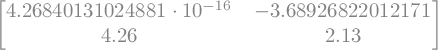

In [4]:
import sympy
sympy.init_printing(use_unicode=True)
sympy.Matrix(α)

### The Lattice

In [5]:
C_positions = []
G_centers = []
hex_centers = []
for n1 in range(-12,12):
    for n2 in range(-12,12):
        G_centers.append(n1*α[:,0] + n2*α[:,1])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,0])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,1])
        hex_centers.append(n1*a[:,0] + n2*a[:,1])

C_positions = np.array(C_positions)
G_centers = np.array(G_centers)
hex_centers = np.array(hex_centers)

C_positions_big = np.array(C_positions[np.intersect1d(np.where(np.abs(C_positions[:,0])<2*L[0])[0],np.where(np.abs(C_positions[:,1])<1.9*L[1])[0])])
He_positions_big = np.array(G_centers[np.intersect1d(np.where(np.abs(G_centers[:,0])<2*L[0])[0],np.where(np.abs(G_centers[:,1])<1.8*L[1])[0])])
hex_centers_big = np.array(hex_centers[np.intersect1d(np.where(np.abs(hex_centers[:,0])<2*L[0])[0],np.where(np.abs(hex_centers[:,1])<1.8*L[1])[0])])

C_positions = np.array(C_positions[np.intersect1d(np.where(np.abs(C_positions[:,0])<L[0])[0],np.where(np.abs(C_positions[:,1])<L[1])[0])])
He_positions = np.array(G_centers[np.intersect1d(np.where(np.abs(G_centers[:,0])<L[0])[0],np.where(np.abs(G_centers[:,1])<L[1])[0])])
hex_centers = np.array(hex_centers[np.intersect1d(np.where(np.abs(hex_centers[:,0])<L[0])[0],np.where(np.abs(hex_centers[:,1])<L[1])[0])])

Text(0, 0.5, 'y  /  Å')

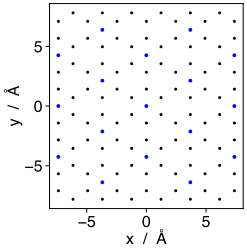

In [6]:
fig,ax = plt.subplots()
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### Visualizing the Lattice Vectors

Text(0, 0.5, 'y  /  Å')

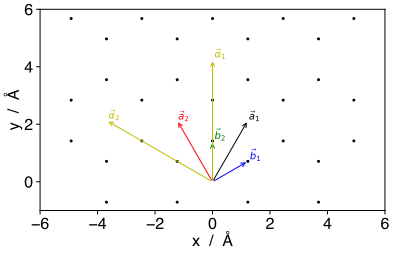

In [7]:
fig,ax = plt.subplots()
#ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.annotate("",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='k'),
            )
ax.annotate(r"$\vec{a}_1$",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(1, 1), textcoords='offset points',
            )

ax.annotate("",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='r'),
            )
ax.annotate(r"$\vec{a}_2$",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(1, 1), textcoords='offset points', color='r'
            )

ax.annotate("",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='b'),
            )

ax.annotate(r"$\vec{b}_1$",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='b'
            )

ax.annotate("",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='g'),
            )
ax.annotate(r"$\vec{b}_2$",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='g'
            )

ax.annotate("",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y'),
            )
ax.annotate(r"$\vec{\alpha}_1$",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y'
            )

ax.annotate("",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y',zorder=-10),
            )
ax.annotate(r"$\vec{\alpha}_2$",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y',zorder=-10
            )

ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')


ax.set_aspect('equal')
ax.set_xlim(-6,6)
ax.set_ylim(-1,6)
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### The Bonds

Text(0, 0.5, 'y  /  Å')

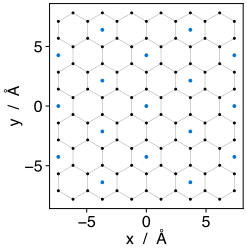

In [8]:
bonds = np.empty([0,4])
fig,ax = plt.subplots()

NG = len(C_positions)
for i in range(NG):
    ri = C_positions[i]
    for j in range(i,NG):
        rj = C_positions[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (aₒ+0.1):
            ax.plot([ri[0],rj[0]],[ri[1],rj[1]],'-', zorder=-1, lw=0.5,color=grey)
            bonds = np.vstack((bonds,[ri[0],rj[0],ri[1],rj[1]]))
            
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color=blue)
ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

In [9]:
x,y = C_positions[:,0],C_positions[:,1]
x1,x2,y1,y2 = bonds[:,0],bonds[:,1],bonds[:,2],bonds[:,3]

## Create a graphic of the dual triangular lattice

In [10]:
dual_bonds = np.empty([0,4])

NA = len(hex_centers)
for i in range(NA):
    ri = hex_centers[i]
    for j in range(i,NA):
        rj = hex_centers[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (np.sqrt(3)*aₒ+0.1):
            dual_bonds = np.vstack((dual_bonds,[ri[0],rj[0],ri[1],rj[1]]))

## Images of Adsorbed Phases
### Setting the colors and sizes for some objects

In [10]:
col_C = Texture(Finish('ambient','0.2','diffuse','0.8'),Pigment('color',brown,'transmit',0.0))
col_bond = Texture(Finish('phong','0.2'),Pigment('color',brown,'transmit',0.0))
col_He = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',green,'transmit',0.0))
col_He_link = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',green,'transmit',0.6))

col_box = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.0))

col_int = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.5))

col_floor = Texture(Pigment('color','White','transmit',0.0))


r_C = 0.30 # radius of C-atoms in graphene
r_He = 3*r_C #/2.258# radius of He-atoms 

## C1/3 Solid
### Generate the graphene lattice

In [11]:
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x))]
cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))]
sphere.extend([Sphere([cr[0],1.1, cr[1]], r_He, col_He) for cr in He_positions])

### Output image to disk

In [215]:
cam = Camera('location',[0,75,0],'look_at',[0,0,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,80,0], 'color','White','parallel')]
#lights.extend([LightSource( [0,75,0], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder 

scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/graphene_solid.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)

## Superfluid

In [207]:
import importlib
importlib.reload(vapory)

<module 'vapory.vapory' from '/Users/agdelma/opt/miniconda3/lib/python3.9/site-packages/vapory/vapory.py'>

In [216]:
# graphene
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x))]
cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))]

# Helium
atoms = [Sphere([cr[0],1.1, cr[1]], r_He/3.0, col_He_link) for cr in hex_centers]

In [224]:
bonds = []
sphere_path = []
num_atoms = hex_centers.shape[0]
num_points = 21
num_shift = 2
s = ''

rmin = 0.4*r_He/3.0
rmax = 0.8*r_He/3.0
m = (rmax-rmin)/int(num_points/2)

for i in range(num_atoms):
    r1 = hex_centers[i,:]
    for j in range(i,num_atoms):
        r2 = hex_centers[j,:]
        Δr = r2-r1
        if Δr[0]**2 + Δr[1]**2 <= 1.05*3*aₒ**2:
            if Δr[1] > 0 or (Δr[1]< 0.001 and Δr[0] > 0):
                path = pypov.generate_linear_path(r1,r2,num_points)
                s = '\n'
                for n in range(num_shift,num_points-num_shift):
                    rad = m*np.abs((n-int(num_points/2)))+rmin
                    
                    loc = [path[n][0]+np.random.uniform(low=-0.001,high=0.001),1.1,path[n][1]+np.random.uniform(low=-0.001,high=0.001)]
                    s += vectorize(loc) + f', {rad}'
                    if n < num_points-1-num_shift:
                        s += ',\n'
                    else:
                        s+= '\n'
   
                s += str(format_if_necessary(col_He_link))
                bonds.append(Macro("sphere_sweep",f"linear_spline\n{num_points-2*num_shift}",s))               

In [227]:
cam = Camera('location',[0,75,0],'look_at',[0,0,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,20,0], 'color','White','parallel')]
#lights.extend([LightSource( [0,75,0], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + [Merge(*bonds,*atoms)]

scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/graphene_superfluid.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)

## Supersolid

In [228]:
# graphene
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x))]
cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))]

# Helium
atoms = [Sphere([cr[0],1.1, cr[1]], r_He/4.0, col_He_link) for cr in hex_centers]

atoms.extend([Sphere([cr[0],1.1, cr[1]], r_He/2.0, col_He) for cr in He_positions])

In [229]:
bonds = []
sphere_path = []
num_atoms = hex_centers.shape[0]
num_points = 21
num_shift = 2
s = ''

rmin = 0.4*r_He/4.0
rmax = 0.8*r_He/4.0
m = (rmax-rmin)/int(num_points/2)

for i in range(num_atoms):
    r1 = hex_centers[i,:]
    for j in range(i,num_atoms):
        r2 = hex_centers[j,:]
        Δr = r2-r1
        if Δr[0]**2 + Δr[1]**2 <= 1.05*3*aₒ**2:
            if Δr[1] > 0 or (Δr[1]< 0.001 and Δr[0] > 0):
                path = pypov.generate_linear_path(r1,r2,num_points)
                s = '\n'
                for n in range(num_shift,num_points-num_shift):
                    rad = m*np.abs((n-int(num_points/2)))+rmin
                    
                    loc = [path[n][0]+np.random.uniform(low=-0.001,high=0.001),1.1,path[n][1]+np.random.uniform(low=-0.001,high=0.001)]
                    s += vectorize(loc) + f', {rad}'
                    if n < num_points-1-num_shift:
                        s += ',\n'
                    else:
                        s+= '\n'
   
                s += str(format_if_necessary(col_He_link))
                bonds.append(Macro("sphere_sweep",f"linear_spline\n{num_points-2*num_shift}",s))     

In [230]:
cam = Camera('location',[0,75,0],'look_at',[0,0,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,20,0], 'color','White','parallel')]
#lights.extend([LightSource( [0,75,0], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + [Merge(*bonds,*atoms)]

scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/graphene_supersolid.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)

## Suspended Wetting

We first construct the bonds for the larger graphene lattice used in wetting.

In [280]:
bonds_big = np.empty([0,4])

NG_big = len(C_positions_big)
for i in range(NG_big):
    ri = C_positions_big[i]
    for j in range(i,NG_big):
        rj = C_positions_big[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (aₒ+0.1):
            bonds_big = np.vstack((bonds_big,[ri[0],rj[0],ri[1],rj[1]]))

x_big,y_big = C_positions_big[:,0],C_positions_big[:,1]
x1_big,x2_big,y1_big,y2_big = bonds_big[:,0],bonds_big[:,1],bonds_big[:,2],bonds_big[:,3]

In [353]:
# graphene
sphere = [Sphere([x_big[i],0, y_big[i]], r_C, col_C) for i in range(len(x_big))]
cylinder = [Cylinder([x1_big[i],0.0,y1_big[i]],[x2_big[i],0.0,y2_big[i]], 0.075,col_bond) for i in range(len(x1_big))]

In [363]:
atoms = []
zspace = 1.1

r_He = 1.2*r_C

for n in range(1,12):

    if n == 1: 
        shift = 0.05
    else:
        shift = 0.1
        
    for i,cr in enumerate(He_positions_big):
        ccx = cr[0] + np.random.uniform(low=-shift*n, high=shift*n) - np.sqrt(3)*aₒ*(n%2)
        if ccx < -2*L[0]:
            ccx += 4*L[0]
            
        ccy = cr[1] + np.random.uniform(low=-shift*n, high=shift*n)
        ccz = n*zspace + np.random.uniform(low=-shift*n, high=shift*n)
        
        if np.abs(ccx) < 2*L[0] and np.abs(ccy) < 2*L[1]:
            atoms.append(Sphere([ccx,ccz,ccy], r_He, col_He))
        
        # shift to get 2/3 filling
        ccx = cr[0] + np.random.uniform(low=-shift*n, high=shift*n) - np.sqrt(3)*aₒ*(n%2) + a[0,0]
        if ccx < -2*L[0]:
            ccx += 4*L[0]
        ccy = cr[1] + np.random.uniform(low=-shift*n, high=shift*n) + a[1,0]
        ccz = n*zspace + np.random.uniform(low=-shift*n, high=shift*n)
        
        if np.abs(ccx) < 2*L[0] and np.abs(ccy) < 2*L[1]:
            atoms.append(Sphere([ccx,ccz,ccy], r_He, col_He))

# now do the vapor
vapor = False

if vapor:
    n_min = n
    n_max = n+8

    trans = pypov.linear([n_min,0.1],[n_max,0.9])
    lin_shift = pypov.linear([n_min,0.1],[n_max,0.5])
    freq = pypov.linear([n_min,2/3],[n_max,0.1])
    rad = pypov.linear([n_min,r_He],[n_max,0.4*r_He])

    for n in range(n_min,n_max):
        shift = lin_shift(n)

        col_He_gas = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',green,'transmit',trans(n)))
        for i,cr in enumerate(hex_centers_big):
            ccx = cr[0] + np.random.uniform(low=-shift*n, high=shift*n) - np.sqrt(3)*aₒ*(n%2)
            ccy = cr[1] + np.random.uniform(low=-shift*n, high=shift*n)
            ccz = n*zspace + np.random.uniform(low=-shift*n, high=shift*n)

            if np.abs(ccx) < 2*L[0] and np.abs(ccy) < 2*L[1] and np.random.random() < freq(n):
                atoms.append(Sphere([ccx,ccz,ccy], rad(n), col_He_gas))

In [366]:
cam = Camera('location',[0,25,-80],'look_at',[0,0,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,25,-80], 'color','White shadowless')]

# cam = Camera('location',[0,80,0],'look_at',[0,0,0])
# bg = Background("color", "White",'transmit',1.0)
# lights = [LightSource( [0,80,0], 'color','White','parallel')]

obj = [bg] + lights + sphere + cylinder + atoms 

scene = Scene(camera=cam,objects=obj,included=included)

filename = '../plots/graphene_suspended.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)